In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import mean_squared_error




In [ ]:
x = np.random.uniform(low=0, high=5, size=200)
f = lambda x: 10*x +1
y  = f(x) + np.random.uniform(low=-20, high= 20, size=200)



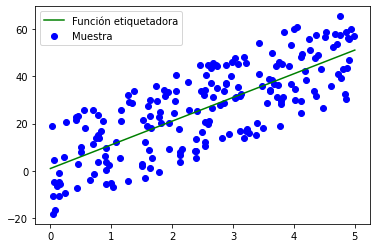

In [ ]:
l = np.linspace(0, 5, 500)

plt.plot(l, f(l), color='green',label = 'Función etiquetadora')

plt.scatter(x, y, label = 'Muestra',color='blue')
plt.legend()   
plt.show()

Vamos a usar un modelo de regresión lineal ajustando sus parámetros mediante el método del descenso del gradiente. 

Nuestra función de error es 
$$E= \sum_{i=1}^{m} (y_i-(\theta_1 x_i+\theta_0))^2$$

Empecemos calculando las derivadas parciales.

\begin{equation}
\begin{split}
\frac{∂E}{∂\theta_0}&=\sum_{i=1}^{m} -2(y_i-(\theta_1 x_i+\theta_0)) \\
\frac{∂E}{∂\theta_1}&=\sum_{i=1}^{m} -2x_i(y_i-(\theta_1 x_i+\theta_0))
\end{split}
\end{equation}

El descenso del gradiente procede en épocas, que consiste en usar el conjunto de entrenamiento para actualizar sus parámetros. También interviene un parámetro que debemos de seleccionar, la tasa de aprendizaje $α$, que se encarga de controlar cuanto se actualizan los valores. En cada época actualizamos los parámetros y reduciremos el error.

\begin{equation}
\begin{split}
\theta_0^* &= \theta_0 -α\frac{∂E}{∂\theta_0} \\
\theta_1^* &= \theta_0 -α\frac{∂E}{∂\theta_1} 
\end{split}
\end{equation}


Vamos a crear una función que actualice nuestros parámetros. Anotación, el 1/n se pone para que no se dependa tanto del tamaño de la muestra


In [ ]:
def update_parameters(x,y,b_0,b_1, a):
  dE_0 = 0
  dE_1 = 0
  n = len(x)
  for i in range(n):
    dE_0 = -2*(y[i]-b_1*x[i]+b_0)
    dE_1 = -2*x[i]*(y[i]-b_1*x[i]+b_0)
    b_0 = b_0 - a*dE_0
    b_1 = b_1 - a*dE_1
  
  return b_0, b_1

Ahora ajustaremos los parámetros de nuestro modelo actualizando b_0 y b_1 en épocas.

In [ ]:
def train(x, y,b_0,b_1,a,epocas):
  l = np.linspace(-1, 6, 50000)
  plt.scatter(x ,y, color='blue',label = 'Muestra')
  plt.plot(l, 10*l+1, color='green', label = 'Función etiquetadora')
  colors = iter(('red','orange','yellow', 'pink'))
  for epoca in range(epocas+1):
    if epoca%200==0:
      f = lambda a: b_1*a +b_0  
      plt.plot(l, f(l),color = next(colors) ,label = f'Función predictora época {epoca}')
      print(f'época:{epoca}',b_0,b_1,f'MSE {mean_squared_error(y, f(x))}')
      b_0, b_1 = update_parameters(x,y,b_0,b_1, a)
    elif epoca%50==0:
      f= lambda a: b_1*a +b_0  
      print(f'época:{epoca}',b_0,b_1,f'MSE {mean_squared_error(y, f(x))}')
      b_0, b_1 = update_parameters(x,y,b_0,b_1, a)
    else:
      b_0, b_1 = update_parameters(x,y,b_0,b_1, a)
  plt.legend()
  plt.savefig(f'linear_gradiend_descent_{epoca}.jpeg') 

  return b_0, b_1

Vamos a ver como actuaría nuestro modelo en 80 épocas, una tasa de aprendizaje 10^{-5}, y partiremos de los valores $\theta_0, \theta_1 = 0$

In [ ]:
import os
os.getcwd()

'/content'

época:0 0 0 MSE 1042.7764741798494
época:50 0.4927629516311163 1.6189890887637517 MSE 760.3433855579075
época:100 0.9188534043139642 3.0087070963961766 MSE 559.7602384308784
época:150 1.2877721114404785 4.201767968932806 MSE 418.43594890366154
época:200 1.6076686527589563 5.226147076617696 MSE 319.8800661680111
época:250 1.8855336090845927 6.105840947615647 MSE 252.07294170105254
época:300 2.127363404462203 6.861433169373963 MSE 206.26897422829924
época:350 2.3383017032244586 7.510579803184794 MSE 176.11816998767543
época:400 2.5227606964863973 8.06842575939358 MSE 157.02162545158137
época:450 2.684525138354252 8.547961952556081 MSE 145.65887726551236
época:500 2.826841585315299 8.96033165927095 MSE 139.641494313862
época:550 2.9524949433249588 9.315093303469109 MSE 137.25937114488457
época:600 3.0638741277872823 9.620445866379855 MSE 137.2950693780902


(3.0659707091225106, 9.626099032041598)

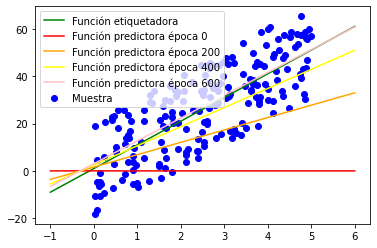

In [ ]:
train(x, y,0,0,0.000001, 600) 


### Para borrar los archivos creados

In [ ]:
import os 
files =os.listdir('/content/')
for f in files: 
  if f not in ['sample_data','.config','.ipynb_checkpoints']:
    os.remove(f)

